## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve , confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE

## Load and Explore Data

In [49]:
df = pd.read_csv("creditcard.csv")

print("Null values in dataset:")
print(df.isnull().sum())

print("\nFirst 5 rows:")
df.head()

Null values in dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
print("Dataset info:")
df.info()

print("\nDataset description:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Dataset shape:
(284807, 31)

Duplicate rows:
1081

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


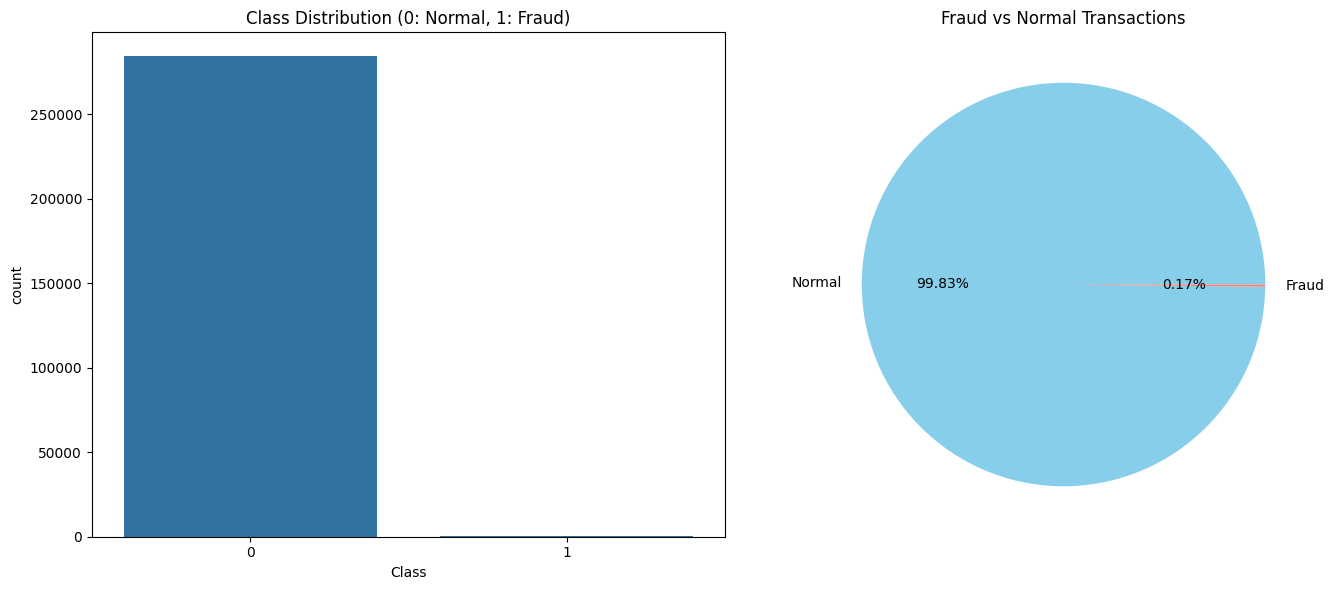

In [51]:
print("\nDataset shape:")
print(df.shape)

print("\nDuplicate rows:")
print(df.duplicated().sum())

print("\nClass distribution:")
print(df['Class'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_title('Class Distribution (0: Normal, 1: Fraud)')

df['Class'].value_counts().plot.pie(
    autopct='%1.2f%%',
    labels=['Normal', 'Fraud'],
    colors=['skyblue', 'salmon'],
    ax=axes[1]
)
axes[1].set_title("Fraud vs Normal Transactions")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

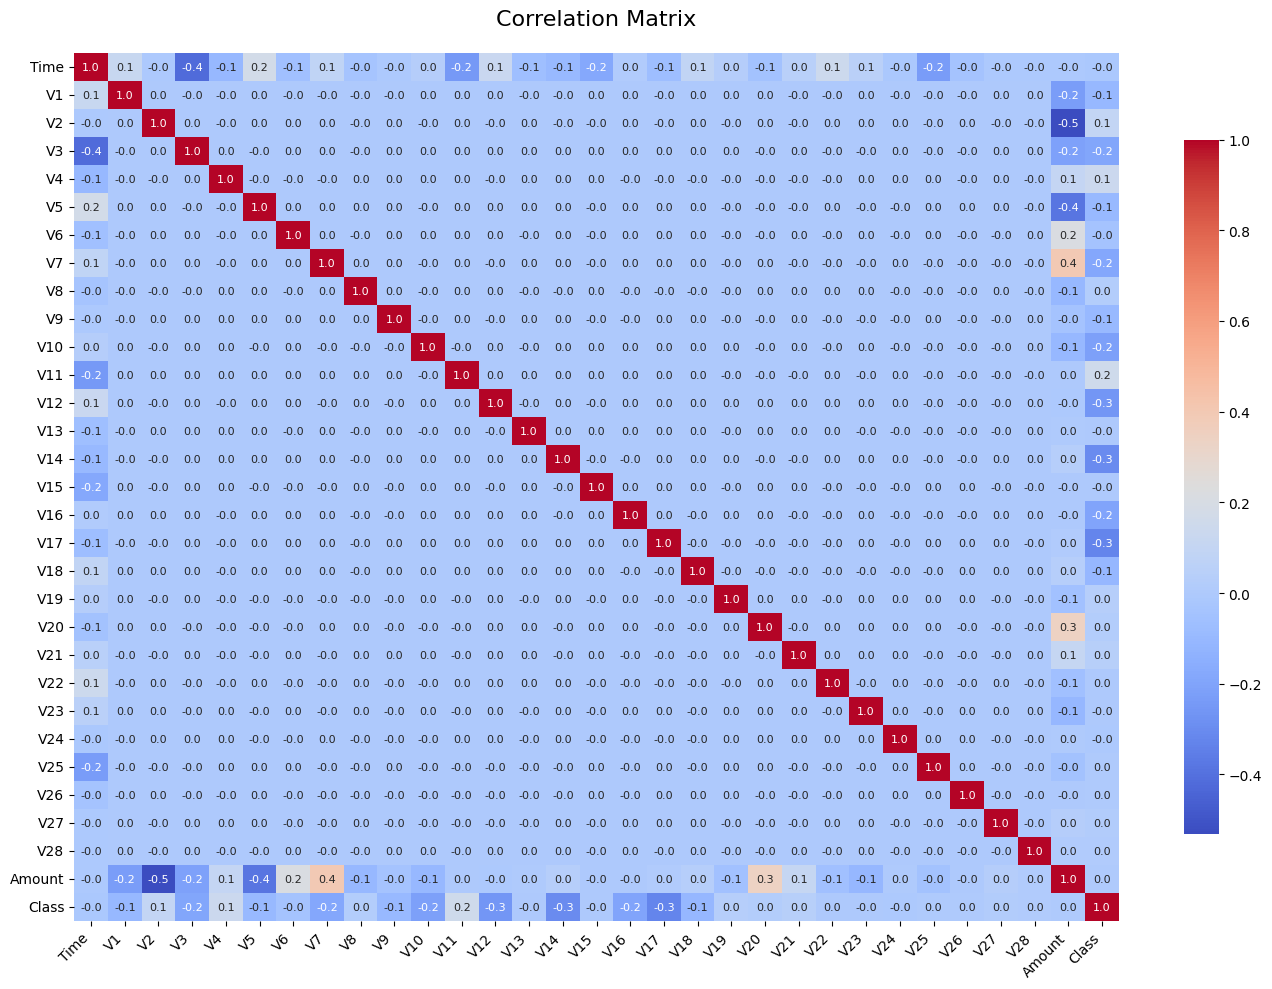

In [52]:
plt.figure(figsize=(14, 10))
corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".1f",           
    annot_kws={'size':8},
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Data Cleaning

In [53]:
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates:", df.shape)

print("\nClass distribution after cleaning:")
print(df['Class'].value_counts())

Dataset shape after removing duplicates: (283726, 31)

Class distribution after cleaning:
Class
0    283253
1       473
Name: count, dtype: int64


## Feature Engineering and Scaling

In [54]:
X = df.drop('Class', axis=1)
y = df['Class']

robust_scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[['Time', 'Amount']] = robust_scaler.fit_transform(X_scaled[['Time', 'Amount']])

standard_scaler = StandardScaler()
v_cols = [col for col in X.columns if col.startswith('V')]
X_scaled[v_cols] = standard_scaler.fit_transform(X_scaled[v_cols])

print("Feature scaling completed.")

Feature scaling completed.


## Feature Selection using Random Forest

In [55]:
print("Number of features before selection:", X_scaled.shape[1])

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_scaled, y)

importances = pd.Series(forest.feature_importances_, index=X_scaled.columns)
top_features_rf = importances.sort_values(ascending=False).head(20).index.tolist()

print("Number of features after selection:", len(top_features_rf))
print("\nSelected Features by Random Forest:")
print(top_features_rf)


Number of features before selection: 30
Number of features after selection: 20

Selected Features by Random Forest:
['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V9', 'V18', 'V7', 'V4', 'V26', 'V3', 'V21', 'V20', 'V1', 'V19', 'V6', 'V27', 'V2', 'V15']


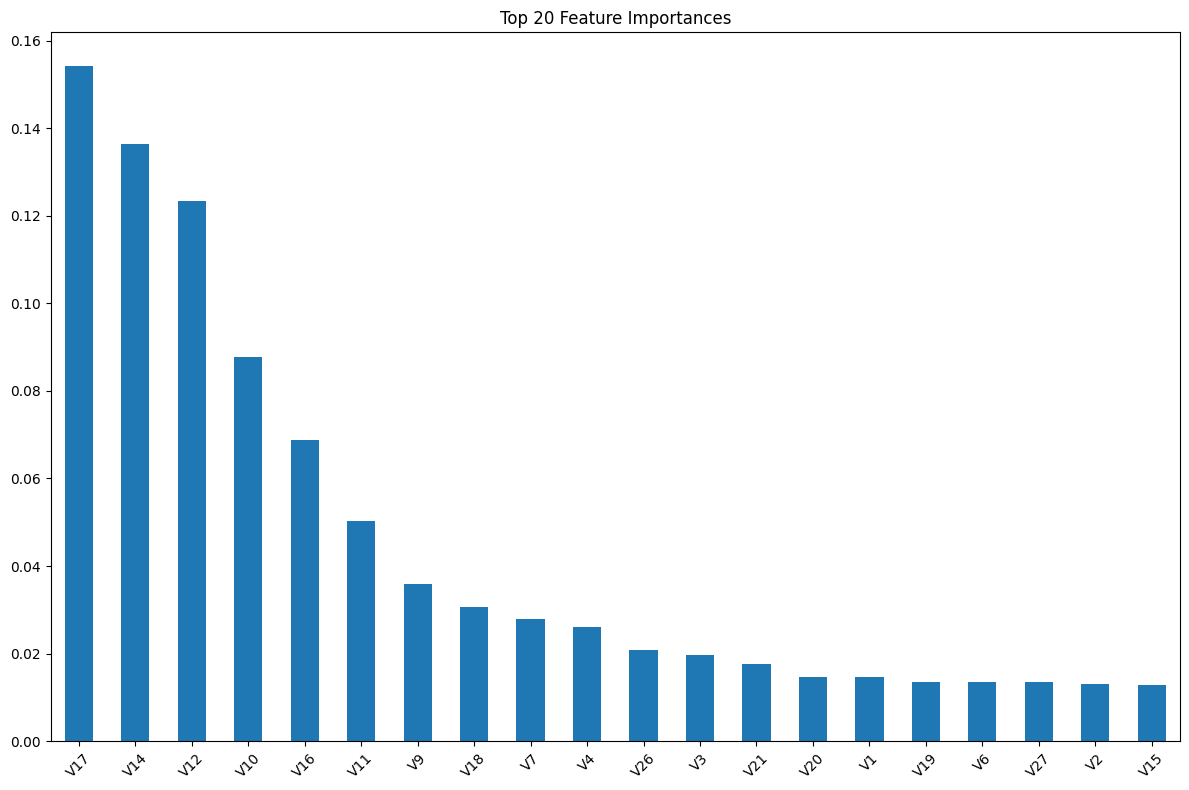

In [56]:
plt.figure(figsize=(12, 8))
importances.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PCA Analysis

In [57]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X_scaled.shape[1]}")
print(f"PCA components (95% variance): {X_pca.shape[1]}")

Original features: 30
PCA components (95% variance): 27


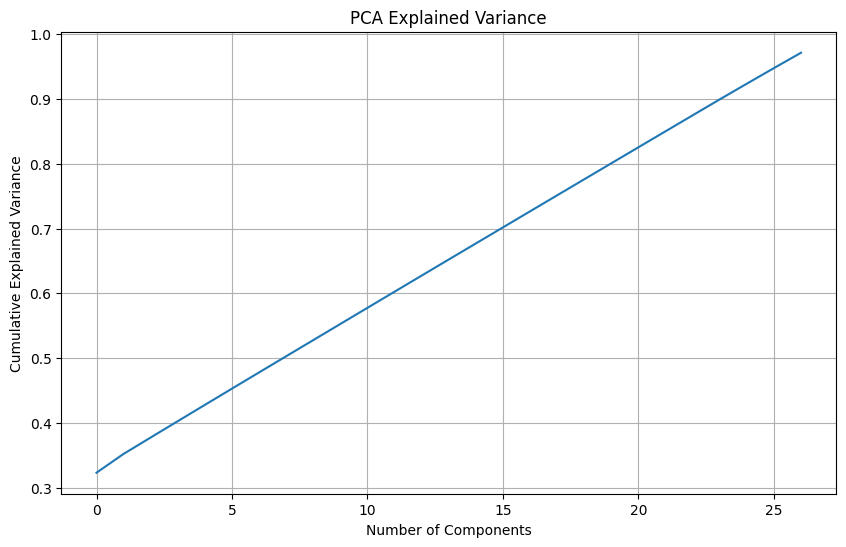

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

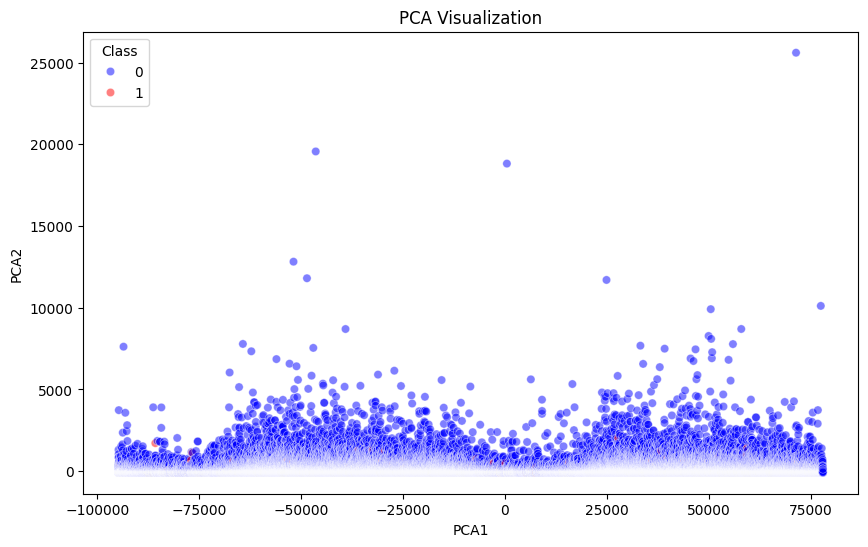

In [59]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('Class', axis=1))
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=df, palette=['blue','red'], alpha=0.5)
plt.title("PCA Visualization")
plt.show()

## Model Training with Stratified K-Fold Cross Validation

### Random Forrest Classifier

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_precision = []
all_recall = []
all_f1 = []
all_roc_auc = []
all_pr_auc = []

fold = 1
for train_index, test_index in skf.split(X_scaled[top_features_rf], y):
    print(f"\nFold {fold}")

    X_train, X_test = X_scaled.iloc[train_index][top_features_rf], X_scaled.iloc[test_index][top_features_rf]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_res, y_train_res)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    all_roc_auc.append(roc_auc)
    all_pr_auc.append(pr_auc)

    print(f"Precision:        {precision:.4f}")
    print(f"Recall:           {recall:.4f}")
    print(f"F1-Score:         {f1:.4f}")
    print(f"ROC AUC Score:    {roc_auc:.4f}")
    print(f"PR AUC Score:     {pr_auc:.4f}")

    fold += 1


Fold 1
Precision:        0.8387
Recall:           0.8211
F1-Score:         0.8298
ROC AUC Score:    0.9608
PR AUC Score:     0.7998

Fold 2
Precision:        0.9259
Recall:           0.7979
F1-Score:         0.8571
ROC AUC Score:    0.9660
PR AUC Score:     0.8427

Fold 3
Precision:        0.8222
Recall:           0.7872
F1-Score:         0.8043
ROC AUC Score:    0.9766
PR AUC Score:     0.8190

Fold 4
Precision:        0.8298
Recall:           0.8211
F1-Score:         0.8254
ROC AUC Score:    0.9665
PR AUC Score:     0.8023

Fold 5
Precision:        0.8571
Recall:           0.8211
F1-Score:         0.8387
ROC AUC Score:    0.9776
PR AUC Score:     0.8297


### Logistic Regreesion


Fold 1
Precision:        0.0553
Recall:           0.8947
F1-Score:         0.1041
ROC AUC Score:    0.9766
PR AUC Score:     0.7539

Fold 2
Precision:        0.0548
Recall:           0.8830
F1-Score:         0.1032
ROC AUC Score:    0.9790
PR AUC Score:     0.7326

Fold 3
Precision:        0.0579
Recall:           0.9255
F1-Score:         0.1090
ROC AUC Score:    0.9841
PR AUC Score:     0.6850

Fold 4
Precision:        0.0545
Recall:           0.9053
F1-Score:         0.1027
ROC AUC Score:    0.9656
PR AUC Score:     0.7140

Fold 5
Precision:        0.0559
Recall:           0.9263
F1-Score:         0.1055
ROC AUC Score:    0.9814
PR AUC Score:     0.7064


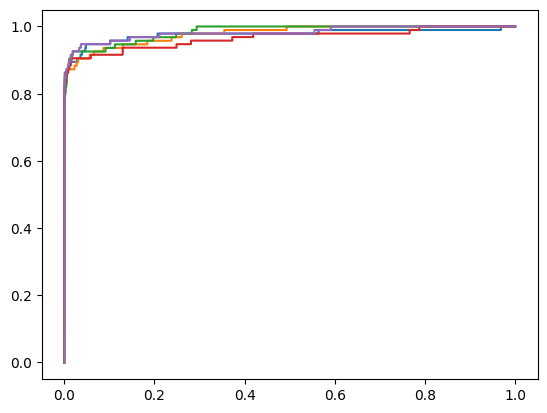

In [61]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_precision, all_recall, all_f1, all_roc_auc, all_pr_auc = [], [], [], [], []

fold = 1
for train_index, test_index in skf.split(X_scaled, y):
    print(f"\nFold {fold}")

    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
    clf.fit(X_train_res, y_train_res)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    all_roc_auc.append(roc_auc)
    all_pr_auc.append(pr_auc)

    print(f"Precision:        {precision:.4f}")
    print(f"Recall:           {recall:.4f}")
    print(f"F1-Score:         {f1:.4f}")
    print(f"ROC AUC Score:    {roc_auc:.4f}")
    print(f"PR AUC Score:     {pr_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC = {roc_auc:.2f})")

    fold += 1

## Model Evaluation Summary

### Random Forrest Classifier

In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56650
           1       0.06      0.93      0.11        95

    accuracy                           0.97     56745
   macro avg       0.53      0.95      0.55     56745
weighted avg       1.00      0.97      0.99     56745



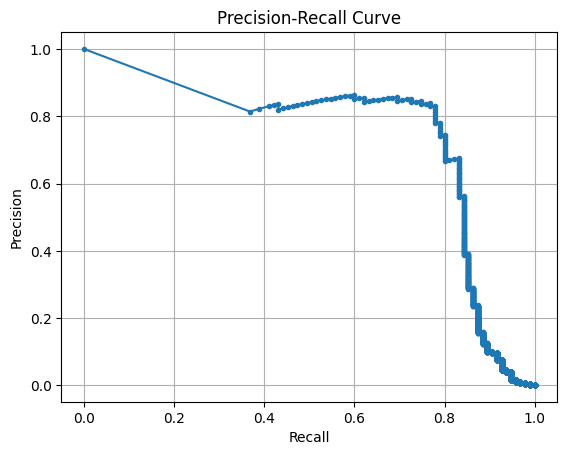

In [63]:
prec, rec, thr = precision_recall_curve(y_test, y_proba)
plt.plot(rec, prec, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

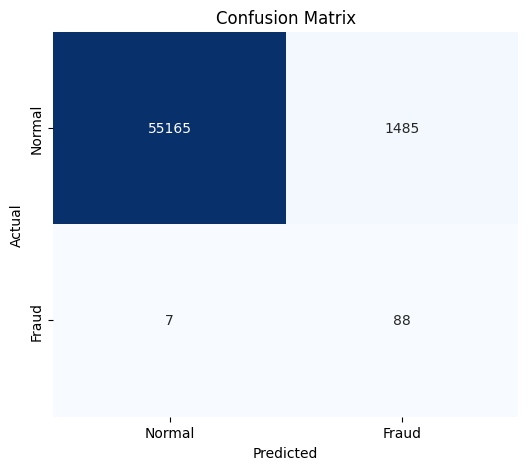

In [64]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Normal", "Fraud"], 
            yticklabels=["Normal", "Fraud"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

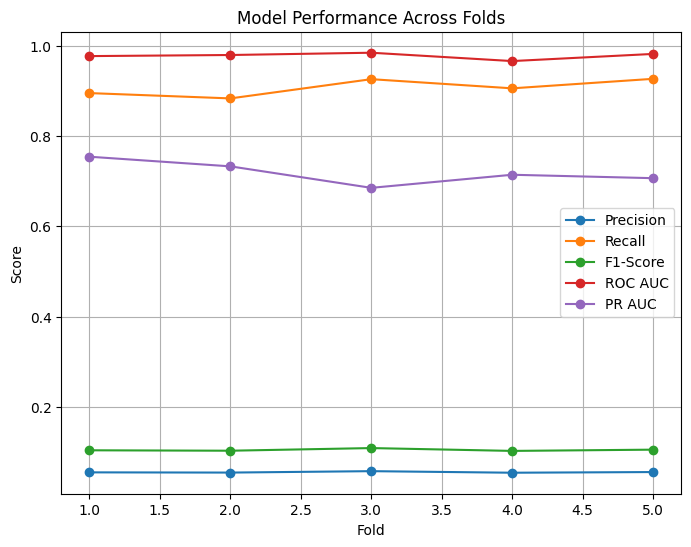

In [65]:
metrics_df = pd.DataFrame({
    'Fold': range(1, 6),
    'Precision': all_precision,
    'Recall': all_recall,
    'F1-Score': all_f1,
    'ROC AUC': all_roc_auc,
    'PR AUC': all_pr_auc
})

plt.figure(figsize=(8, 6))
for metric in ['Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC']:
    plt.plot(metrics_df['Fold'], metrics_df[metric], marker='o', label=metric)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Model Performance Across Folds')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
print("\n=== Model Evaluation Summary ===")
print(f"Average Precision:  {np.mean(all_precision):.4f} (±{np.std(all_precision):.4f})")
print(f"Average Recall:     {np.mean(all_recall):.4f} (±{np.std(all_recall):.4f})")
print(f"Average F1-Score:   {np.mean(all_f1):.4f} (±{np.std(all_f1):.4f})")
print(f"Average ROC AUC:    {np.mean(all_roc_auc):.4f} (±{np.std(all_roc_auc):.4f})")
print(f"Average PR AUC:     {np.mean(all_pr_auc):.4f} (±{np.std(all_pr_auc):.4f})")


=== Model Evaluation Summary ===
Average Precision:  0.0557 (±0.0012)
Average Recall:     0.9070 (±0.0170)
Average F1-Score:   0.1049 (±0.0023)
Average ROC AUC:    0.9774 (±0.0064)
Average PR AUC:     0.7184 (±0.0234)


### Logistic Regression

In [72]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Fraud"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56650
       Fraud       0.06      0.93      0.11        95

    accuracy                           0.97     56745
   macro avg       0.53      0.95      0.55     56745
weighted avg       1.00      0.97      0.99     56745



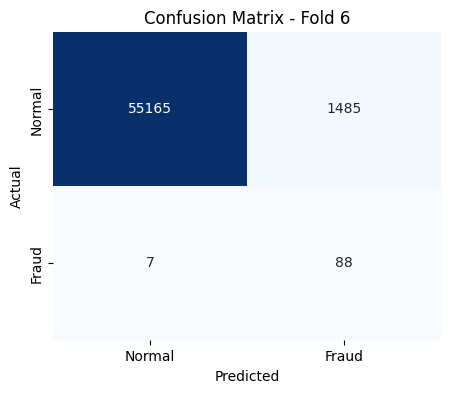

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title(f"Confusion Matrix - Fold {fold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

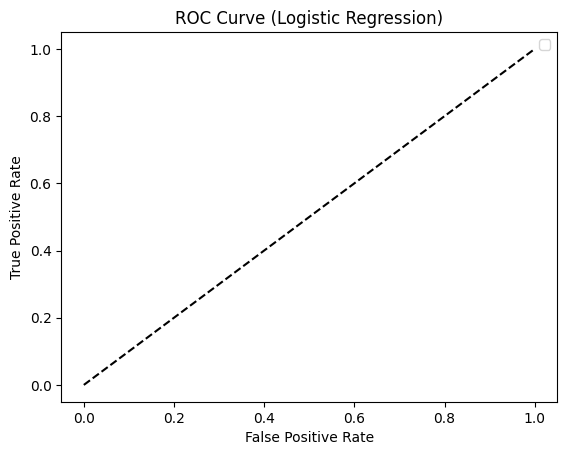

In [67]:
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

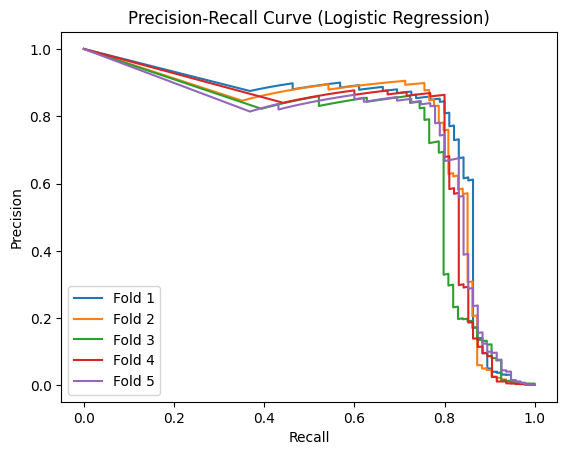

In [68]:
plt.figure()
for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
    clf.fit(X_train_res, y_train_res)
    y_proba = clf.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f"Fold {i}")

plt.title("Precision-Recall Curve (Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [69]:
print("\n=== Average Results ===")
print(f"Precision:        {np.mean(all_precision):.4f}")
print(f"Recall:           {np.mean(all_recall):.4f}")
print(f"F1-Score:         {np.mean(all_f1):.4f}")
print(f"ROC AUC Score:    {np.mean(all_roc_auc):.4f}")
print(f"PR AUC Score:     {np.mean(all_pr_auc):.4f}")


=== Average Results ===
Precision:        0.0557
Recall:           0.9070
F1-Score:         0.1049
ROC AUC Score:    0.9774
PR AUC Score:     0.7184
